# **Machine Learning**
### TensorFlow for Finance



### Instituto Superior de Engenharia de Lisboa (ISEL)
### Licenciatura em Engenharia Informática e Multimédia (LEIM)
2019-2020

Bavo Knaeps & Jitse Wierdsma

The models used for predicting the stock market are mostly Neural Networks. This is because stock prices don't follow a traditional 'line' that can be defined by functions. This means that a typical regression model will fail to predict the values accurately. We will show this in a small example.

First we install/import the packages we are going to use in this small case study.

In [1]:
!pip install tensorflow
!pip install keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing


### Importing file

First, we will import a .csv file. In this case we chose for a crypto coin called Bitcoin, because of the hype around cryptocurrency. There are also a lot of API's that support cryptocurrency that we can use, which will come in handy later on in the project.

### Setting the target value

In this case we want to predict the next open price of Bitcoin. We set the target of each row by creating a new column 'target_open' and shifting the value of the next row to this column. This means that now we have the next open price on each row.

### Dropping rows and colums

In this small case study we drop a few rows to improve the data for training the models. Some values never change so they will not influence the training and prediction process, they will only slow it down. 
We drop the first row because it contains false data that might have a bad influence on the models. Next, we drop the last row. By creating the new column and shifting we create a NaN value in this cell for the last row. Model training has a hard time dealing with NaN value's. We could also solve this with the .getdummies() function but it's better to clean the data before using it.

We set 2 columns, date and symbol, to be dropped. They do not influence the target_open in any way so they are rendered useless.

### Setting the X and y values

A model uses target and feature values for training and predicting values.

By binding y to y = df[TARGET], we obtain only the target_open values of the dataframe.

For our target values we bind X to df[FEATURES] where FEATURES = df.columns. We previously dropped all the columns that are useless so we can use this function safely.

In [2]:
df = pd.read_csv("./data.csv")
df.head() # print the first lines of the file

df["target_open"] = df["High"].shift(-1)

#drop first (useless)
df.drop(0, inplace = True)
#drop last row (contains NaN)
df.drop(len(df),inplace=True)

drop = ["Date","Symbol"]
#drop the date (useless for training) 
#drop the symbol name (doesn't change so no use for training)
df.drop(df[drop], inplace = True, axis = 1)

TARGET = ["target_open"]
FEATURES =  df.columns

X = df[FEATURES]
X.drop(df[TARGET], inplace = True, axis = 1)

y = df[TARGET]

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,Open,High,Low,Close,Volume BTC,Volume USD,target_open
1,7169.65,7197.99,7128.55,7144.12,346.46,2482945.79,7189.88
2,7150.00,7189.88,7129.65,7169.65,380.62,2725437.77,7170.00
3,7127.01,7170.00,7083.51,7150.00,708.60,5046541.62,7210.00
4,7210.00,7210.00,7110.30,7127.01,743.72,5319075.80,7232.44
5,7210.18,7232.44,7186.90,7210.00,306.71,2211323.40,7252.00


### Normalization

Some values influence the training process more than others (by being such large numbers). That's why we need to normalize the data so that each column has an equally relevant impact on the models.

### Splitting into train and test data 

To test a model, you require data that the *model* hasn't "seen" yet, but data that *you* know is correct. This so that you can analyze the accuracy of the model. We use the function train_test_split from sklearn to split these dataframes into train_X, test_X, train_y and test_y.

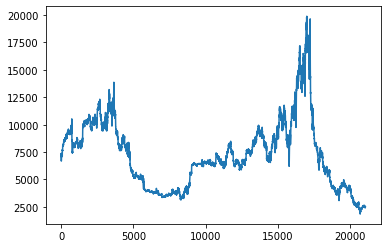

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=122)
# Visualizing the prices
plt.plot(df[TARGET])
plt.show()
# The data is sorted by date
# so the plot shows the fluctuations of the price over time.

### Sequential model

The first model we are going to implement is the Sequential model.

Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

In this case we use dense layer modules*. On the input layer we set the shape of (6,), this is the shape of each row of the X values. Next we define 2 more layers. The second contains 50 nodes and the third contains 20. 
Finally, we set the final layer to 1 node as output.

*Dense implements the operation: `output = activation(dot(input, kernel) + bias)`, where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

### Optimizing 

The optimizer we are using is called Adam. Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks. To show the progress of the model we use MSE and accuracy while training.

### Fitting the data

To train the model we have to fit the model. We also set the epoch hyperparameter (this is so it doesn't take too long). While fitting you can follow the progress in the output. 

### Score and predict

Now we want to know how good our model is so we are going to predict a value and see if it's close to the actual value. The will be different after each training session. To check the score of the model we use the method 'evaluate' with the params test_X and test_y. This method will then predict each row and check how accurate it is compared to the actual value. After that, the method will return how accurate it actually is. In this case it's not that accurate because we need to test with more layers, diffrent modules, ... 

In [35]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from keras import losses
from keras.optimizers import SGD

# normalize to ease training
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(train_y.values)
x_scaled = min_max_scaler.fit_transform(train_X.values)
train_y= pd.DataFrame(y_scaled)
train_X = pd.DataFrame(x_scaled)

model = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.relu, input_shape = (6,)),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.softmax),
    keras.layers.Dense(1),
])

model.compile(optimizer="adam", 
              loss=losses.mean_squared_error,
              metrics=['accuracy'])

model.fit(train_X, train_y, epochs=100)

test_X =  pd.DataFrame(min_max_scaler.fit_transform(test_X.values))
test_y = pd.DataFrame(min_max_scaler.fit_transform(test_y.values))

pred = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(test_X)))
print (model.evaluate(test_X,test_y))

Train on 16850 samples
Epoch 1/100
16850/16850 [==============================] - 1s 57us/sample - loss: 0.0084 - acc: 1.1869e-04
Epoch 2/100
16850/16850 [==============================] - 1s 53us/sample - loss: 1.9178e-04 - acc: 1.1869e-04
Epoch 3/100
16850/16850 [==============================] - 1s 53us/sample - loss: 6.1888e-05 - acc: 1.1869e-04
Epoch 4/100
16850/16850 [==============================] - 1s 55us/sample - loss: 4.1466e-05 - acc: 1.1869e-04
Epoch 5/100
16850/16850 [==============================] - 1s 53us/sample - loss: 3.4552e-05 - acc: 1.1869e-04
Epoch 6/100
16850/16850 [==============================] - 1s 55us/sample - loss: 3.3252e-05 - acc: 1.1869e-04
Epoch 7/100
16850/16850 [==============================] - 1s 57us/sample - loss: 3.1043e-05 - acc: 1.1869e-04
Epoch 8/100
16850/16850 [==============================] - 1s 57us/sample - loss: 2.9923e-05 - acc: 1.1869e-04
Epoch 9/100
16850/16850 [==============================] - 1s 57us/sample - loss: 2.8095e-05 

### Different libraries 

To extend our search for a good prediction model, we also went and took a look at a different library: Sklearn. In this case we used a standard SGDRegressor. Next, we train, test and score the model again. Here we can see that this model scores great! This might not be good news, however, because this will most likely be an 'overfit'. This means that the model is trained *too well* and when it's presented some new data it will fail to accurately predict the next price.

In [36]:
from sklearn.linear_model import SGDRegressor

sgd =  SGDRegressor(max_iter=100)

sgd.fit(train_X,train_y.values.ravel())
print (sgd.score(test_X,test_y.values.ravel()))

pred = sgd.predict([test_X.loc[5]])

print (min_max_scaler.inverse_transform( [pred]))
print (min_max_scaler.inverse_transform( [test_y.loc[5]]))

0.9990707200847666
[[0.27337165]]
[[0.26793955]]
